Activate the project

In [1]:
using Pkg
Pkg.activate(".")

  Activating environment at `/media/labfiles/nsom/repos/kp-lflm-group/src/KPpack/Project.toml`


# Load the package KPpack

In [2]:
using KPpack

# Create a KP model

In [3]:
using Symbolics

In [4]:
## from Igor Vurgaftman, Matthew P. Lumb, and Jerry R. Meyer, Bands and Photons in III-V Semiconductor Quantum Structures,Oxford, 2020 chapter 3
model=["E_g+c*(1+2*F)*(k_x^2+k_y^2+k_z^2)+VBO" "0+im(cp*k_x*P)" "0+im(cp*k_y*P)" "0+im(cp*k_z*P)" "0" "0" "0" "0";
    "0+im(-cp*k_x*P)" "VBO-L*k_x^2-M*(k_y^2+k_z^2)" "-N*k_x*k_y" "-N*k_x*k_z" "0" "0" "0" "0";
    "0+im(-cp*k_y*P)" "-N*k_x*k_y" "VBO-L*k_y^2-M*(k_x^2+k_z^2)" "-N*k_y*k_z" "0" "0" "0" "0";
    "0+im(-cp*k_z*P)" "-N*k_x*k_z" "-N*k_y*k_z" "VBO-L*k_z^2-M*(k_y^2+k_x^2)" "0" "0" "0" "0";
    "0" "0" "0" "0" "E_g+c*(1+2*F)*(k_x^2+k_y^2+k_z^2)+VBO" "0+im(cp*k_x*P)" "0+im(cp*k_y*P)" "0+im(cp*k_z*P)" ;
    "0" "0" "0" "0" "0+im(-cp*k_x*P)" "VBO-L*k_x^2-M*(k_y^2+k_z^2)" "-N*k_x*k_y" "-N*k_x*k_z";
    "0" "0" "0" "0" "0+im(-cp*k_y*P)" "-N*k_x*k_y" "VBO-L*k_y^2-M*(k_x^2+k_z^2)" "-N*k_y*k_z";
    "0" "0" "0" "0" "0+im(-cp*k_z*P)" "-N*k_x*k_z" "-N*k_y*k_z" "VBO-L*k_z^2-M*(k_y^2+k_x^2)";];

strK=["k_x","k_y","k_z"];

HsT= KPpack.createSymbMatrix(model);

Emomentum=KPpack.setMomentum(strK);
HVar=KPpack.getVar(HsT);
#real(HsT)

In [5]:
HstrSOC=["0" "0" "0" "0" "0" "0" "0" "0";
        "0" "0" "0+i*(-d/3)" "0" "0" "0" "0" "d/3";
        "0" "0+i*(d/3)" "0" "0" "0" "0" "0" "0+i*(-d/3)";
        "0" "0" "0" "0" "0" "-d/3" "0+i*(d/3)" "0";
        "0" "0" "0" "0" "0" "0" "0" "0";
        "0" "0" "0" "-d/3" "0" "0" "0+i*(d/3)" "0";
        "0" "0" "0" "0+i*(-d/3)" "0" "0+i*(-d/3)" "0" "0";
        "0" "d/3" "0+i*(d/3)" "0" "0" "0" "0" "0";];
dvar=KPpack.StrtoSymbConv("Δ")
HSOC= KPpack.createSymbMatrix(HstrSOC); HSVar= KPpack.getVar(HSOC);
HSocRe=substitute(real(HSOC),Dict(HSVar[1]=>dvar)); HSocIm=substitute(imag(HSOC),Dict(HSVar[1]=>dvar))
HSOC=HSocRe+im*HSocIm;

In [6]:
L="c*(g_1+4*g_2-(E_p/E_g))"; L=KPpack.StrtoSymbConv(L);
M="c*(g_1-2*g_2)"; M=KPpack.StrtoSymbConv(M)
N="c*(6*g_3-(E_p/E_g))"; N=KPpack.StrtoSymbConv(N)
#D="c*(1+2*F+(E_p/E_g))"; D=KPpack.StrtoSymbConv(D)
#Ac="L+c*(E_p/E_g)"; Ac=KPpack.StrtoSymbConv(Ac); AcVar=Symbolics.get_variables(Ac);Ac=substitute(Ac,Dict(AcVar[1]=>L))
#Cc="N+c*(E_p/E_g)"; Cc=KPpack.StrtoSymbConv(Cc); CcVar=Symbolics.get_variables(Cc);Cc=substitute(Cc,Dict(CcVar[1]=>N));

In [7]:
Hre=real(HsT); Him=imag(HsT) 
#Hre=substitute(Hre,Dict(HVar[3]=>D)); Him=substitute(Him,Dict(HVar[3]=>D)); 
#Hre=substitute(Hre,Dict(HVar[7]=>Ac)); Him=substitute(Him,Dict(HVar[7]=>Ac)); 
Hre=substitute(Hre,Dict(HVar[8]=>L)); Him=substitute(Him,Dict(HVar[8]=>L));
Hre=substitute(Hre,Dict(HVar[9]=>M)); Him=substitute(Him,Dict(HVar[9]=>M));
Hre=substitute(Hre,Dict(HVar[10]=>N)); Him=substitute(Him,Dict(HVar[10]=>N));
#Hre=substitute(Hre,Dict(HVar[9]=>Cc)); Him=substitute(Him,Dict(HVar[9]=>Cc)); 

In [8]:
H8x8=Hre+im*Him;
Htot=H8x8+HSOC;

In [9]:
real(Htot)
#HVar

8×8 Matrix{Num}:
  E_g + VBO + c*(1 + 2F)*(k_x^2 + k_y^2 + k_z^2)  …                         0
 0                                                                   (1//3)*Δ
 0                                                                          0
 0                                                                          0
 0                                                                          0
 0                                                …     -c*k_x*k_z*(6g_3 + (-E_p) / E_g)
 0                                                      -c*k_y*k_z*(6g_3 + (-E_p) / E_g)
 0                                                   VBO - c*(g_1 + 4g_2 + (-E_p) / E_g)*(k_z^2) - c*(g_1 - 2g_2)*(k_x^2 + k_y^2)

In [10]:
var=Emomentum[3] 
H0,H1,H2=KPpack.createKm(Htot,var);


In [11]:
imag(H0)

8×8 Matrix{Num}:
         0  P*cp*k_x   P*cp*k_y          0  …          0         0          0
 -P*cp*k_x         0  (-1//3)*Δ          0             0         0          0
 -P*cp*k_y  (1//3)*Δ          0          0             0         0  (-1//3)*Δ
         0         0          0          0             0  (1//3)*Δ          0
         0         0          0          0      P*cp*k_x  P*cp*k_y          0
         0         0          0          0  …          0  (1//3)*Δ          0
         0         0          0  (-1//3)*Δ     (-1//3)*Δ         0          0
         0         0   (1//3)*Δ          0             0         0          0

## test the bulk calculation

In [12]:
material="GaAs"; Temp=0; soc=true;
tipo="KaneII";
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

mm=KPpack.Materials(material,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0);
KPpack.ParMat(mm,Temp)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

1.519

In [13]:
kmax= 1.4; Nt=100; consth=0.038; const2=0.19
Ktot,Etot=KPpack.calcBandBulk(mm,kmax,Nt,Htot,Emomentum,consth,const2)
#++++++++++++++++++++++++

EDOS, aDOS = KPpack.DOS(-2,2.2,0.01,Etot,0.04);

# Plot band diagram

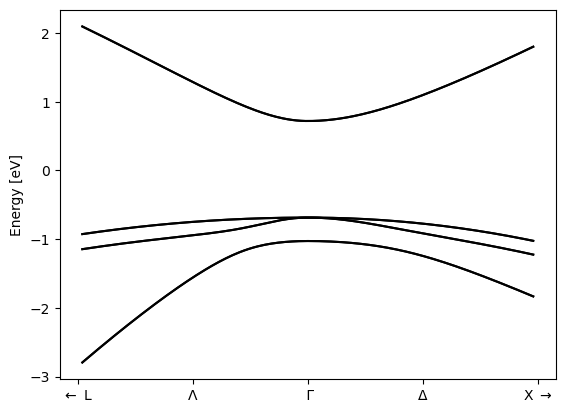

In [14]:
KPpack.PlotBands(Etot,Ktot);

# Plot DOS

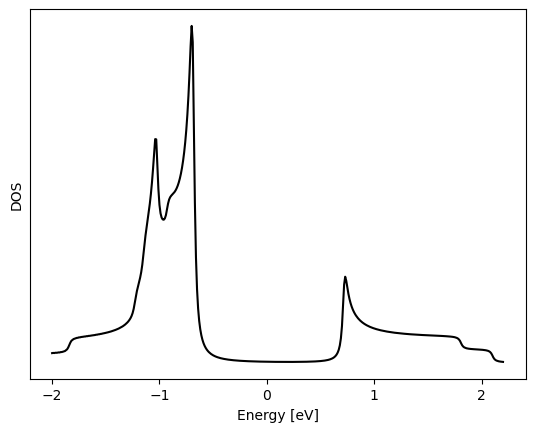

In [15]:
KPpack.PlotDOS(EDOS,aDOS);

# Make a structure

In [179]:
nlayer=5; Npts=180
layer=Array{KPpack.mat}(undef,nlayer)

layer[1]=KPpack.mat("AlGaAs_0.35",90);
layer[2]=KPpack.mat("AlGaAs_0.35",90);
layer[3]=KPpack.mat("GaAs",5);
#layer[4]=KPpack.mat("AlGaAs_0.3",2);
#layer[5]=KPpack.mat("GaAs",6);
layer[4]=KPpack.mat("AlGaAs_0.35",90);
layer[5]=KPpack.mat("AlGaAs_0.35",90);


X,boundary =KPpack.mesh(Npts,layer,nlayer);
mlayer=Array{KPpack.Materials}(undef, length(X));

boundPoints=KPpack.supParams(layer,X,boundary,mlayer,Temp);

# Plot structure

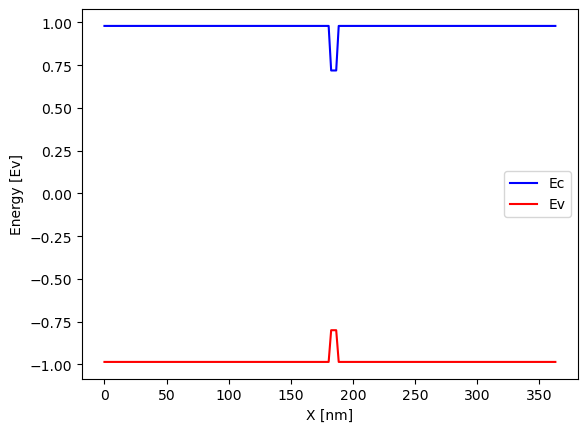

In [180]:
kind="both"
KPpack.plotProf(mlayer,X,kind);

## find eigenvalues solving for K=0

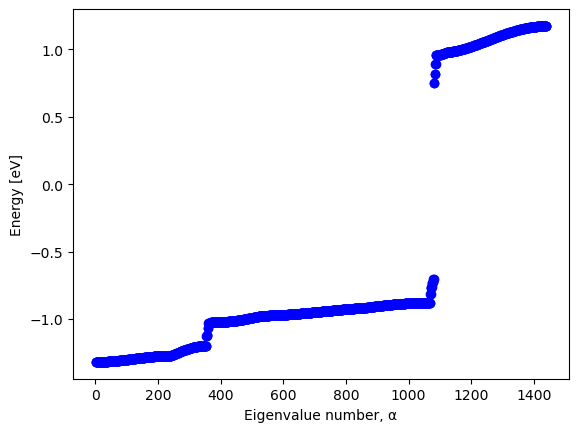

  8.371430 seconds (63.85 k allocations: 142.572 MiB)


In [185]:
c=0.038; cps=0.14; dx=X[2]-X[1]; pb=true

@time Eqw0, EVqw0=KPpack.EigSolQW(mlayer,Npts,H0,H1,H2,c,cps,dx,Emomentum,pb);
KPpack.PloteigvQW(Npts,Eqw0);

# QW Band Structure Calculation

In [186]:
kmax= 1.0; Nt=100; 
n=8
sV,sC,pos=KPpack.eigenValQW(real(Eqw0))

pl=1; pm=1;
@time Ecq11,Evq11,Kqw11 =KPpack.DiagQWM(mlayer,kmax,Nt,dx,pl,pm,Npts,H0,H1,H2,n,c,cps,sV,sC,Emomentum,pb);

pl=1; pm=0;
@time Ecq10,Evq10,Kqw10 =KPpack.DiagQWM(mlayer,kmax+0.3,Nt,dx,pl,pm,Npts,H0,H1,H2,n,c,cps,sV,sC,Emomentum,pb);

 83.562946 seconds (7.57 M allocations: 18.622 GiB, 0.47% gc time)
 70.436420 seconds (7.48 M allocations: 17.522 GiB, 0.56% gc time)


## Valence Band 

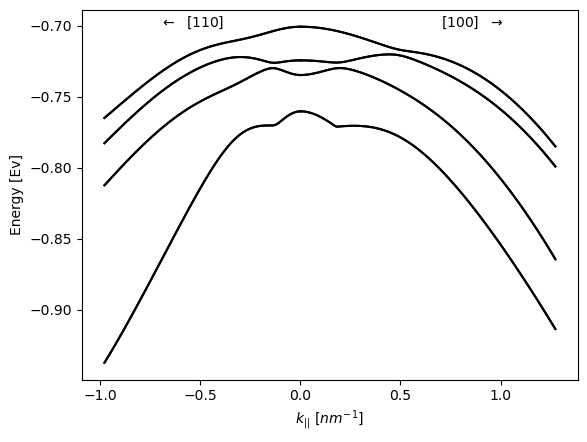

In [187]:
option="complete_V"; poslab=sV
KPpack.PlotQWBand(Ecq11,Evq11,Kqw11,Ecq10,Evq10,Kqw10,option,poslab,kmax);

## Conduction Band

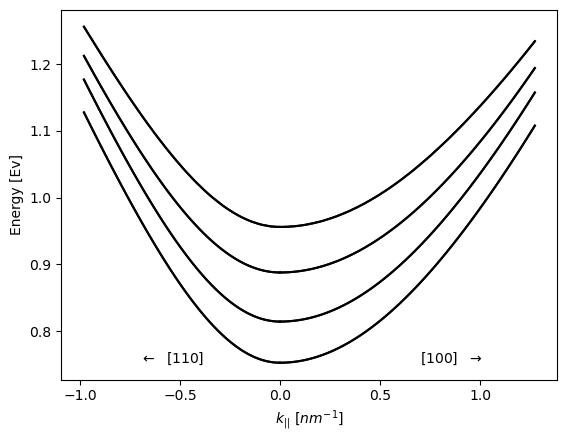

In [188]:
option="complete_C"; poslab=sC
KPpack.PlotQWBand(Ecq11,Evq11,Kqw11,Ecq10,Evq10,Kqw10,option,poslab,kmax);

# DOS QW

## DOS Valence Band

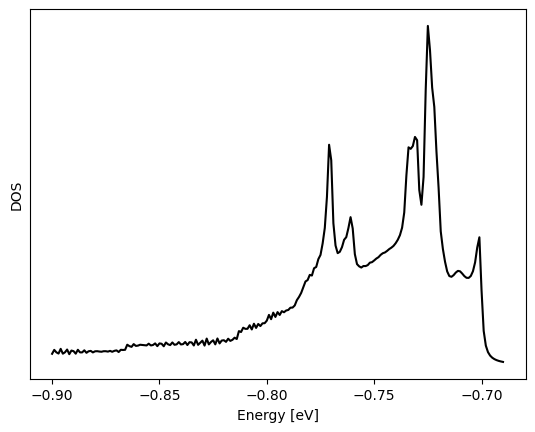

In [209]:
Evqw= vcat(Evq11,Evq10);
EDOSv, aDOSv = KPpack.DOS(-0.9,-0.69,0.001,Evqw,2e-3);
KPpack.PlotDOS(EDOSv,aDOSv);

## DOS Conduction Band

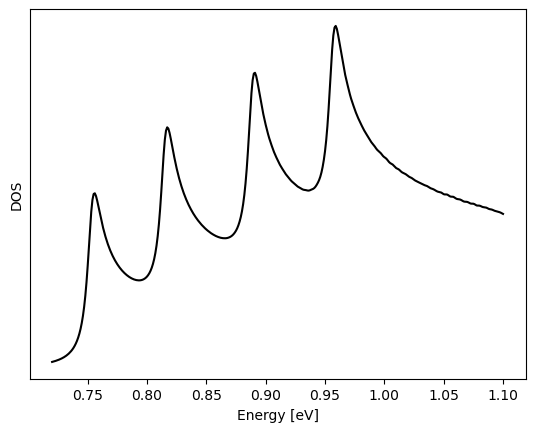

In [190]:
Evqw= vcat(Ecq11,Ecq10);
EDOSc, aDOSc = KPpack.DOS(0.72,1.1,0.001,Evqw,1e-2);
KPpack.PlotDOS(EDOSc,aDOSc);

In [195]:
kx,ky=0.1,0.0; pb=true
hns=KPpack.FDHamiltonian(H0,H1,H2,mlayer,kx,ky,dx,c,cps,Npts,Emomentum,pb)

1440×1440 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 10080 stored entries:
⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈
⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀
⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦

save a file with band structure

In [44]:
# save a file in folder data with a name given by the user
dat=hcat(Ktot,Etot);
name="BandStructure_GaAs_1"
KPpack.writefile(dat,name)

# Symbolic

## create a Finite differences matrices

# ====================================================================================

In [26]:
A,B,C=KPpack.constructMatrixFD(H0,H1,H2);
exclude=["k_x","k_y","k_z","c","cp"]; b1="r"; b2="l"
excS=KPpack.setExcludePar(exclude)
PrH=KPpack.getVar(Htot)
Al,Ar,Bl,Br,Cr,Cl=KPpack.createBmatrizFD(H0,H1,H2,PrH,excS,b1,b2);


In [27]:
mt=real(H2)

8×8 Matrix{Num}:
 c*(1 + 2F)*(k_x^2 + k_y^2) - c*(1 + 2F)*(1 + k_x^2 + k_y^2)  …       0
        0                                                             0
        0                                                             0
        0                                                             0
        0                                                             0
        0                                                     …       0
        0                                                             0
        0                                                        -((c*(E_p - E_g*g_1 - 4E_g*g_2)) / E_g)

In [28]:
simplify(mt[2,2])

c*(1 + k_y^2)*(g_1 - 2g_2) - c*(g_1 - 2g_2)*(k_y^2)

In [29]:
imag(Htot)

8×8 Matrix{Num}:
         0  P*cp*k_x   P*cp*k_y   P*cp*k_z  …          0         0          0
 -P*cp*k_x         0  (-1//3)*Δ          0             0         0          0
 -P*cp*k_y  (1//3)*Δ          0          0             0         0  (-1//3)*Δ
 -P*cp*k_z         0          0          0             0  (1//3)*Δ          0
         0         0          0          0      P*cp*k_x  P*cp*k_y   P*cp*k_z
         0         0          0          0  …          0  (1//3)*Δ          0
         0         0          0  (-1//3)*Δ     (-1//3)*Δ         0          0
         0         0   (1//3)*Δ          0             0         0          0

# ================================

In [30]:
using PyCall, PyPlot

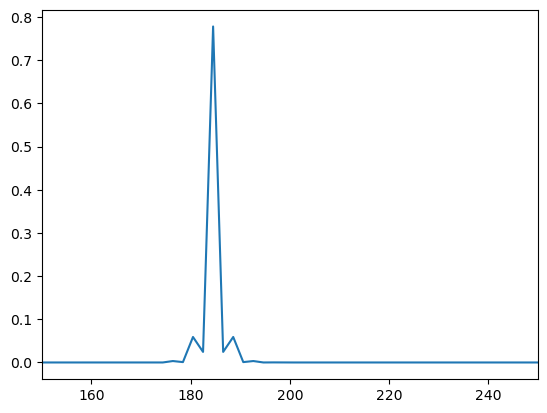

0.8145253064092077 - 3.446630001939977e-19im

In [207]:
i=pos+3


vec=EVqw0[1:8:end,i]

vv=vec.*transpose(vec')
#vv=real(vec)
plt.xlim(150,250)
plt.plot(X,real(vv))
Eqw0[i]

In [33]:
vec

180-element Vector{ComplexF64}:
  3.0041197263238256e-17 + 1.337911248508178e-16im
  -8.537747395867155e-17 - 2.3768723075477184e-17im
   5.968553709081009e-17 - 4.5491570700116e-17im
  1.5943776433381297e-17 + 2.7940513392725426e-16im
   7.256693664773275e-17 - 1.3537085407443802e-16im
   7.112763542372002e-18 + 1.9657552899850277e-16im
 -4.2920820018706194e-17 - 2.1079202246055996e-16im
  1.2796935015572734e-16 + 1.0693378577198625e-16im
 -3.6384959530079207e-17 + 6.79697135851955e-17im
  1.3165067461111429e-17 + 2.7727178481546325e-17im
  3.2296162905114646e-17 + 3.946525754117977e-16im
  -5.266478524417366e-17 - 2.201046997449995e-16im
  -3.817016417192119e-17 + 8.449240383029975e-17im
                         ⋮
  -9.769145807953548e-18 - 1.2933320837610987e-16im
  1.8992213000217317e-17 + 1.6410913175116516e-16im
 -2.1460901256180137e-16 - 2.0159010682577258e-16im
   6.957524118600897e-17 + 1.7908486042183514e-16im
 -1.4564713537943547e-16 - 1.507603656178753e-16im
  1.70935642911